# 5. Transformada de Laplace

A transformada de Laplace é dada por

$$\mathcal{L}\{f(t)\} = F(t) = \int_0^\infty f(t) e^{-st} \mathrm{d}s $$

e pode ser utilizada para resolver PVIs. As funções que admitem transformadas são as seccionalmente contínuas e de ordem exponencial quando $t \rightarrow \infty$. A ideia central do uso para resolver PVIs é transformar o problema para o domínio de $s$, resolver para $F(s)$ e recuperar $y(t)$ invertendo a transformação (ransformada inversa).

**Exemplo 1:** Seja f(t)=e^{at}, $t \leq 0$, a transformada de Laplace é dada por

$$\mathcal{L}\{e^{at}\} = F(t) = \int_0^\infty e^{at} e^{-st} \mathrm{d}s =
 \int_0^\infty e^{(a-s)t} \mathrm{d}s = \lim_{A \rightarrow \infty} \int_0^A e^{(a-s)t} \mathrm{d}s$$
Então

$$F(s) = \frac{1}{s-a} \text{,}\,\,\,\, s>0$$

**Exemplo 2:** Seja f(t)=sen(at), $t \leq 0$, a transformada de Laplace é dada por

$$\mathcal{L}\{sen(at)\} = \int_0^\infty sen(at) e^{-st} \mathrm{d}s$$

Integrando por partes duas vezes chega-se em 

$$ F(s) = \frac{a}{s^2+a^2}\text{,}\,\,\,\, s>0$$

**Exemplo 3:** Seja $f(t)=5e^{-2t}-3sen(4t)$, $t \leq 0$. Lembrando que a transformada de Laplace é um operador linear, escrevemos

$$\mathcal{L}\{5e^{-2t}-3sen(4t)\} = 5\mathcal{L}\{e^{-2t}\}- 3\mathcal{L}\{sen(4t)\}
$$

que resulta

$$ F(s) = \frac{5}{s+2}-\frac{12}{s^2+16}\text{,}\,\,\,\, s>0$$

### Transformada de Laplace com Sympy

Vamos usar Sympy para calcular algumas transformadas de Laplace. Começamos importando as bibliotecas e definindo alguns símbolos.

In [56]:
import sympy as sp
sympy.init_printing()

t, s = sp.symbols('t, s')
a = sp.symbols('a', real=True, positive=True)

**Exemplo 4:** Transformada de $f(t)=e^{at}$, $t \geq 0$.

In [57]:
f = sp.exp(a*t)
F = sp.integrate(f*sp.exp(-s*t), (t, 0, sp.oo))
F

⎧      -1                                                    π   s    
⎪   ─────────     for a - cos(│arg(s)│)⋅│s│ < 0 ∧ │arg(s)│ < ─ ∧ ─ ≠ 1
⎪     ⎛    s⎞                                                2   a    
⎪   a⋅⎜1 - ─⎟                                                         
⎪     ⎝    a⎠                                                         
⎪                                                                     
⎨∞                                                                    
⎪⌠                                                                    
⎪⎮  a⋅t  -s⋅t                                                         
⎪⎮ ℯ   ⋅ℯ     dt                       otherwise                      
⎪⌡                                                                    
⎪0                                                                    
⎩                                                                     

In [27]:
sp.simplify(F)

⎧      1                                                     π   s    
⎪    ──────       for a - cos(│arg(s)│)⋅│s│ < 0 ∧ │arg(s)│ < ─ ∧ ─ ≠ 1
⎪    -a + s                                                  2   a    
⎪                                                                     
⎪∞                                                                    
⎨⌠                                                                    
⎪⎮  t⋅(a - s)                                                         
⎪⎮ ℯ          dt                       otherwise                      
⎪⌡                                                                    
⎪0                                                                    
⎩                                                                     

Também existe uma função pronta no sympy. A função retorna também as condições de convergência da integral imprópria.

In [28]:
sp.laplace_transform(f, t, s)

⎛  1        s    ⎞
⎜──────, a, ─ ≠ 1⎟
⎝-a + s     a    ⎠

**Exemplo 2:** Transformada de $f(t)=sen(at)$, $t \geq 0$.

In [37]:
f = sp.sin(a*t)
F = sp.integrate(f*sp.exp(-s*t), (t, 0, sp.oo))
sp.simplify(F)

⎧         a                             
⎪      ───────        for 2⋅│arg(s)│ < π
⎪       2    2                          
⎪      a  + s                           
⎪                                       
⎨∞                                      
⎪⌠                                      
⎪⎮  -s⋅t                                
⎪⎮ ℯ    ⋅sin(a⋅t) dt      otherwise     
⎪⌡                                      
⎩0                                      

In [38]:
sp.laplace_transform(f, t, s)

⎛   a            ⎞
⎜───────, 0, True⎟
⎜ 2    2         ⎟
⎝a  + s          ⎠

### Solução de PVI por transformada de Laplace

Primeiramente, vamos observar que, sob certas condições (ver Boyce, 2020, corolário 6.2.2, p.245), a transformada de $f^{(n)}(t)$ é dada por 

$$ \mathcal{L}\{f^{(n)}(t) \} = s^n\mathcal{L}\{f(t) \} - s^{n-1}f(0) -...-sf^{(n-2)}(0)-f^{(n-1)}(0)$$ 

Essa relação sera útil na resolução de PVIs. 

### Customizando as funções do Sympy

Pode ser útil criear uma função simplificada para a transformada de Laplace. Usando o argumento `nodonds=True`podemos omitir as condições de contorno na resposta. 

In [39]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

**Exemplo 3:** Usando as função customizada para os exemplos 1 e 2.

In [40]:
L(sp.exp(a*t))

  1   
──────
-a + s

In [41]:
L(sp.sin(a*t))

   a   
───────
 2    2
a  + s 

**Exemplo 4:** Transformada de $f(t)=5e^{-2t}-3sen(4t)$, $t \geq 0$.

In [49]:
F = L(5*sp.exp(-2*t)-3*sp.sin(4*t))
F

    2            
 5⋅s  - 12⋅s + 56
─────────────────
        ⎛ 2     ⎞
(s + 2)⋅⎝s  + 16⎠

Decompondo em frações parciais

In [55]:
F.apart(s)

     12       5  
- ─────── + ─────
   2        s + 2
  s  + 16        

In [51]:
f = invL(F)
f

                      -2⋅t     
-3⋅sin(4⋅t)⋅θ(t) + 5⋅ℯ    ⋅θ(t)

Aqui, o $\theta(t)$ representa a função degrau unitário _Heaviside_.

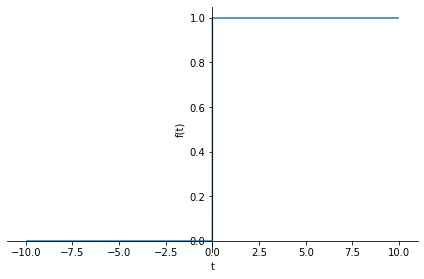

In [52]:
sympy.plot(sympy.Heaviside(t));

## Referências

https://github.com/alchemyst/Dynamics-and-Control